<a href="https://colab.research.google.com/github/Amanat1598/sync_intern/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sync_intern Task2
# Face Mask Detection


In [283]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [284]:
!kaggle datasets download -d bismaimran17/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [252]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [253]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [254]:
categories={'with_mask':1,'without_mask':0}

In [255]:
directory = '/content/Dataset/train/train'

data=[]
labels=[]
for category in categories:
    path=os.path.join(directory,category)
    print(path)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        img=cv2.imread(img_path)
        image = cv2.resize(img, (128,128))
        data.append(image)
        labels.append(category)

/content/Dataset/train/train/with_mask
/content/Dataset/train/train/without_mask


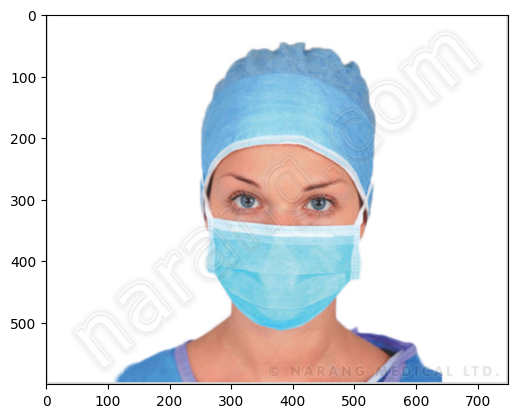

In [256]:
img = mpimg.imread('/content/Dataset/train/train/with_mask/ds1917.jpg')
imgplot = plt.imshow(img)
plt.show()

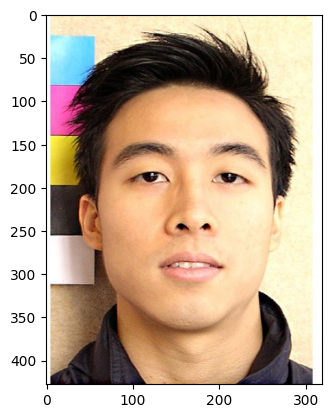

In [226]:
img=mpimg.imread('/content/Dataset/train/train/without_mask/15.jpg')
imgplot = plt.imshow(img)
plt.show()

In [257]:
print(labels)

['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'

In [258]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [259]:
df=pd.DataFrame(labels)

In [260]:
df1=df[0]

In [261]:
df1

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1310    0.0
1311    0.0
1312    0.0
1313    0.0
1314    0.0
Name: 0, Length: 1315, dtype: float32

In [262]:
df3=df1.values.tolist()

In [263]:
labels=df3

In [264]:

print(labels)
type(labels)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

list

In [265]:

unique_values = set(labels)
print(unique_values)

{0.0, 1.0}


In [266]:
data = np.array(data)
labels = np.array(labels)

In [267]:
x = np.array(data)
y = np.array(labels)

In [268]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [280]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [281]:
x_test

array([[[[131, 174, 216],
         [132, 174, 217],
         [132, 174, 218],
         ...,
         [186, 197, 224],
         [185, 196, 223],
         [185, 196, 223]],

        [[131, 172, 216],
         [132, 172, 218],
         [133, 171, 220],
         ...,
         [186, 197, 224],
         [185, 196, 223],
         [185, 196, 223]],

        [[132, 169, 219],
         [132, 169, 220],
         [131, 168, 220],
         ...,
         [186, 198, 222],
         [185, 197, 221],
         [185, 197, 221]],

        ...,

        [[ 57,  66, 156],
         [ 57,  66, 156],
         [ 57,  66, 156],
         ...,
         [ 77,  69, 139],
         [ 76,  65, 143],
         [ 74,  62, 144]],

        [[ 56,  65, 155],
         [ 56,  65, 155],
         [ 57,  66, 156],
         ...,
         [ 77,  70, 138],
         [ 76,  66, 143],
         [ 75,  64, 144]],

        [[ 56,  65, 156],
         [ 57,  66, 156],
         [ 57,  66, 156],
         ...,
         [ 79,  73, 137],
        

In [269]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [282]:
x_train_scaled

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [270]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [271]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [272]:
history = model.fit(x_train_scaled, y_train,  epochs=5,validation_split=0.1)

Epoch 1/5
30/30 [==============================] - 25s 814ms/step - loss: 0.6755 - accuracy: 0.6438 - val_loss: 0.3243 - val_accuracy: 0.9245
Epoch 2/5
30/30 [==============================] - 24s 800ms/step - loss: 0.2643 - accuracy: 0.9059 - val_loss: 0.2401 - val_accuracy: 0.9434
Epoch 3/5
30/30 [==============================] - 23s 775ms/step - loss: 0.1490 - accuracy: 0.9545 - val_loss: 0.2257 - val_accuracy: 0.9340
Epoch 4/5
30/30 [==============================] - 24s 777ms/step - loss: 0.1579 - accuracy: 0.9545 - val_loss: 0.1550 - val_accuracy: 0.9623
Epoch 5/5
30/30 [==============================] - 25s 850ms/step - loss: 0.1235 - accuracy: 0.9641 - val_loss: 0.1469 - val_accuracy: 0.9528


In [275]:
def detect_face_mask(img):
  inp=cv2.imread(img)
  cv2_imshow(inp)
  res=cv2.resize(inp,(128,128))
  res=res/255.0
  shape=np.reshape(res,[1,128,128,3])
  y_pred=model.predict(shape)
  y_pred = np.argmax(y_pred)

  print(y_pred)
  if y_pred == 1:
    print('With_Mask')
  else:
    print('Without_Mask')

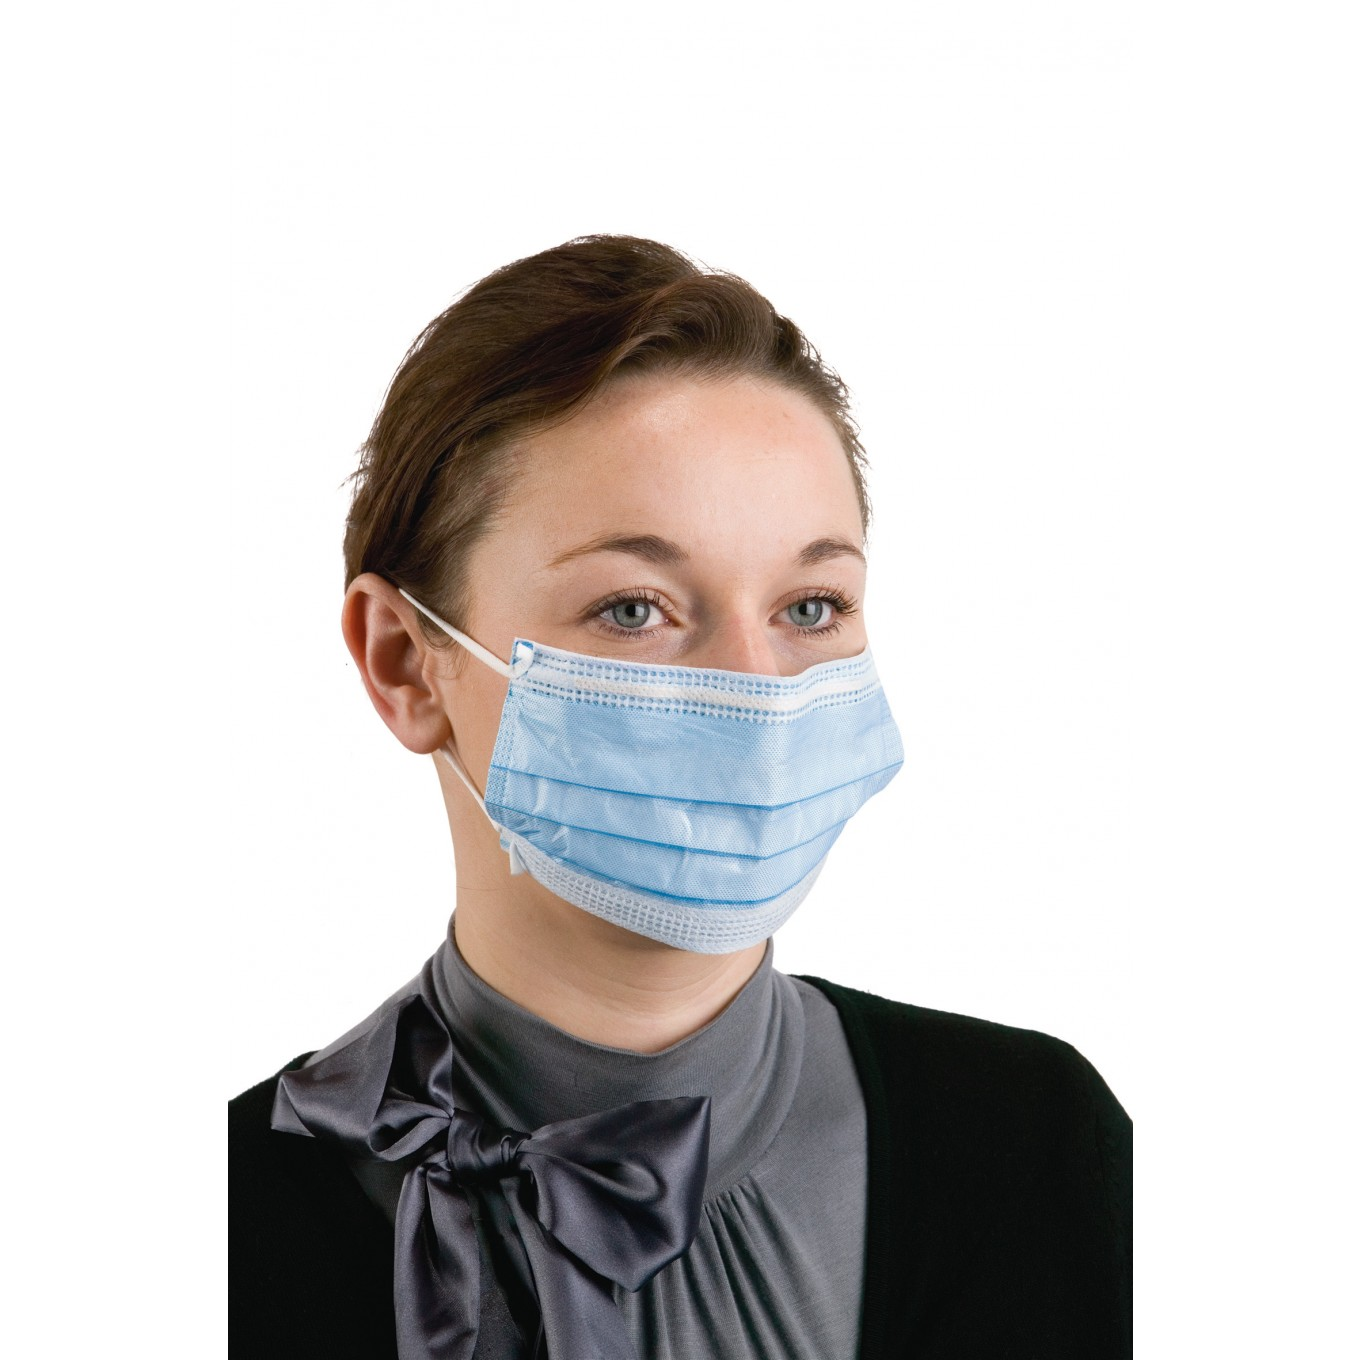

1/1 [==============================] - 0s 62ms/step
1
With_Mask


In [285]:
detect_face_mask('/content/Dataset/train/train/with_mask/007563.jpg')

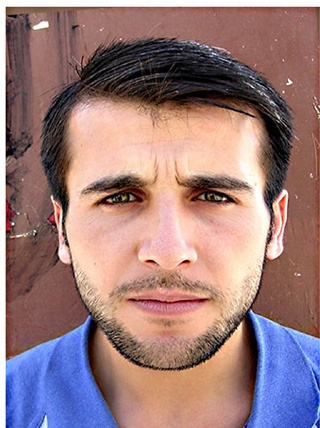

1/1 [==============================] - 0s 40ms/step
0
Without_Mask


In [277]:
detect_face_mask('/content/Dataset/train/train/without_mask/101.jpg')